<a href="https://colab.research.google.com/github/Victorlouisdg/colab_plots/blob/main/trajectory_performances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb -qqq

In [2]:
import wandb
wandb.login()

wandb: Currently logged in as: victorlouis (use `wandb login --relogin` to force relogin)


True

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
api = wandb.Api()

In [5]:
runs = api.runs(path="victorlouis/fold_sleeves")
runs = [run for run in runs if len(run.summary._json_dict) and 'mean_distance' in run.summary]
print(len(runs))

134


In [6]:
def radial_plot(thetas, radii, losses):
    cm = 1/2.54  # centimeters in inches
    fig = plt.figure(dpi=100, figsize=(30*cm, 15*cm), facecolor="white") # set dpi to 100 for paper/slides
    fig.suptitle("Trajectory Performances", x = 0.6, y=0.95, fontsize=14)

    ax = fig.add_subplot(111, polar=True)
    ax.set_thetamin(0)
    ax.set_thetamax(92.5)
    ax.set_ylim(0.0, 1.04)

    ax.set_xticks(np.linspace(0, np.deg2rad(90), 7)) #10))
    ax.text(np.deg2rad(-10), 0.55,'Height Ratio',ha='center',va='center', fontsize=12)

    ax.text(np.deg2rad(50), 1.2,'Tilt Angle',ha='center',va='center', fontsize=12)

    vmax = np.percentile(losses, 95)
    print(vmax)

    s = ax.scatter(thetas, radii, c=losses, s=280, cmap='plasma_r', vmin=0, vmax=vmax)

    colorbar = fig.colorbar(s, ax=ax, aspect=50) #, pad=0.1)

    # Get the default ticks and tick labels
    # ticklabels = colorbar.ax.get_ymajorticklabels()
    ticks = list(colorbar.get_ticks())

    # # Append the ticks (and their labels) for minimum and the maximum value
    colorbar.set_ticks([vmax] + ticks)
    colorbar.set_ticklabels(["≥" + f"{vmax:.4f}"] + [f"{t:.4f}" for t in ticks])
    colorbar.ax.text(-0.025, vmax/2.0, "Mean distance", rotation=90, ha='center',va='center')

In [7]:
thetas = []
radii = []
losses = []


print("Amount of runs:", len(runs))
for run in runs:
    s = run.summary
    radii.append(s['height_ratio'])
    thetas.append(np.deg2rad(90.0 - s['tilt_angle']))
    losses.append(s['mean_distance'])

    # print(f"{run.name:<20} {s['height_ratio']:^8.3f} {90.0 - s['tilt_angle']:^8.0f} {s['mean_distance']:^8.4f}")


Amount of runs: 134


0.027405607277863807


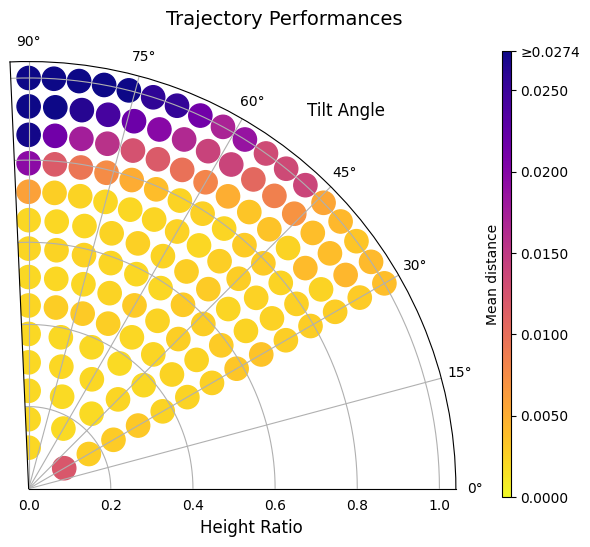

In [8]:
radial_plot(thetas, radii, losses)

In [9]:
print(min(losses))
i = np.argmin(losses)
print("Best angle:", 90 - np.rad2deg(thetas[i]))
print(f"Best height ratio: {radii[i]:.3f}")

0.001987295042716996
Best angle: 36.0
Best height ratio: 0.377


In [10]:
print(max(losses))
i = np.argmax(losses)
print("Worst angle:", 90 - np.rad2deg(thetas[i]))
print(f"Worst height ratio: {radii[i]:.3f}")

0.03991625731188631
Worst angle: 0.0
Worst height ratio: 1.000


(100, 100)


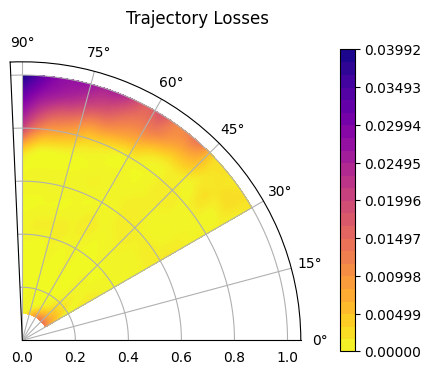

In [11]:
from logging import logProcesses
from scipy.interpolate import griddata

def radial_plot3(thetas, radii, losses):
    fig = plt.figure(dpi=100, facecolor="white", figsize=(5,4))
    fig.suptitle("Trajectory Losses")
    ax = fig.add_subplot(111, polar=True)
    ax.set_thetamin(0)
    ax.set_thetamax(92.5)
    ax.set_ylim(0.0, 1.05)
    # ax.set_rmax(2.0) # does not work
    ax.set_xticks(np.linspace(0, np.deg2rad(90), 7)) #10))
    i = np.argmin(losses)


    xi = np.linspace(0, np.deg2rad(90.0), 100)
    yi = np.linspace(0, 1.0, 100)
    zi = griddata((thetas, radii), losses, (xi[None,:], yi[:,None]), method='cubic')
    X, Y = np.meshgrid(xi, yi)
    # print(xi)
    print(zi.shape)
    # print(Z)

    vmax = max(losses)

    s = ax.contourf(X, Y, zi, cmap="plasma_r", vmin=min(losses), vmax=vmax, levels=200)
    # ax.scatter(X, Y, c='red')

    # s = ax.pcolormesh(X, Y, zi, cmap="plasma_r")

    # # s = ax.tricontourf(thetas, radii, losses, s=100, cmap='plasma_r', vmin=0, vmax=0.02)
    m = plt.cm.ScalarMappable(cmap="plasma_r")
    m.set_array(zi)
    m.set_clim(0, vmax)
    fig.colorbar(m, ax=ax, pad=0.1, boundaries=np.linspace(0, vmax, 25))
    # fig.colorbar(m, ax=ax, pad=0.1, boundaries=np.linspace(0, vmax, 25), orientation="horizontal")

radial_plot3(thetas, radii, losses)